# Inferential Statistics Writeup

#### Capstone Project 1
##### Tamara Monge

First, let's set-up our notebook environment.

In [1]:
# import standard libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import scipy.stats as stats

Next, let's import our cleaned dataset (for a detailed explanation of the cleaning steps performed, see `DataWrangling_Writeup.ipnyp`). 

In [2]:
df = pd.read_csv('cleaned_baltimore_parking_data.csv', parse_dates=True)

In [3]:
df.index = df['violdate'] 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 623208 entries, 2016-09-17 11:38:00 to 2017-11-07 16:15:00
Data columns (total 22 columns):
violdate       623208 non-null object
citation       623208 non-null int64
tag            623208 non-null object
state          623208 non-null object
make           623208 non-null object
address        623208 non-null object
violcode       623208 non-null float64
description    623208 non-null object
violfine       623208 non-null float64
violdate.1     623208 non-null object
balance        623208 non-null float64
openfine       623208 non-null float64
openpenalty    623208 non-null float64
location       623208 non-null object
year           623208 non-null int64
month          623208 non-null int64
day            623208 non-null int64
hour           623208 non-null int64
longitude      623208 non-null float64
latitude       623208 non-null float64
lonlat         623208 non-null object
quadrant       623208 non-null object
dtypes: float64(7), int64

As can be seen above, our cleaned dataset contains 623,208 complete records.

Now, let's simplify our `state` and `balance` variables to be binary variables: `instate` and `paid`. 



In [5]:
# simplify state to a binary variable, instate=[0,1]
def to_instate(state):
    """Returns 1 if state is MD, 0 otherwise."""
    if state == 'MD': 
        instate = 1
    else:
        instate = 0
    return instate

df['instate'] = df['state'].apply(to_instate)

In [6]:
# simplify balance to a binary variable, paid=[0,1] 
def to_paid(balance):
    """Returns 1 if balance is 0, 0 otherwise."""
    if balance == 0:
        paid = 1
    else:
        paid = 0
    return paid

df['paid'] = df['balance'].apply(to_paid)

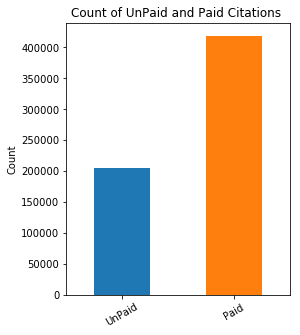

In [7]:
_ = df['paid'].value_counts(ascending=True).plot(kind='bar', figsize=(4,5))
_ = plt.title('Count of UnPaid and Paid Citations ')
_ = plt.xticks([0,1], ['UnPaid', 'Paid'], rotation=30)
_ = plt.ylabel('Count')

In [8]:
print(round(100*df['paid'].sum()/len(df['paid'])),'% of accounts have been paid.')

67.0 % of accounts have been paid.


Later in this project we will build machine learning models to predict whether or not a citation will be paid ($y$ = `paid`) based on our other variables ($X$ = [`violfine`, `description`, `instate`, `make`, `quadrant`, `year`, `month`, `day`, `hour`]. With this in mind, let's use this Inferential Statistics project to determine if there exist dependencies between the predictive and predicted variables we will use in our models. 

Let's first approach this visually by inspecting countplots of the paid and unpaid citations for each our predictive variables.

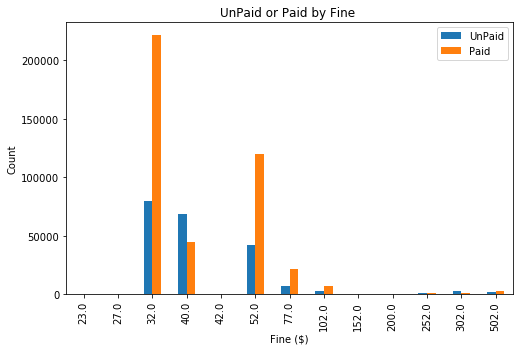

In [9]:
_ = pd.crosstab(df['violfine'], df['paid']).plot(kind='bar', figsize=(8,5))
_ = plt.title('UnPaid or Paid by Fine ')
_ = plt.xlabel('Fine ($)')
_ = plt.ylabel('Count')
_ = plt.legend(['UnPaid', 'Paid'])

- `violfine` appears to be a good predictive variable because most citations with a fine of \$40 or \$302 go unpaid, while most citations with a fine of any other amount are paid. 

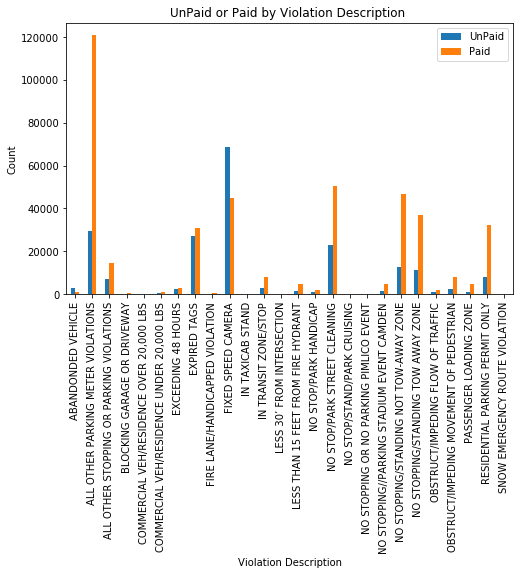

In [10]:
_ = pd.crosstab(df['description'], df['paid']).plot(kind='bar', figsize=(8,5))
_ = plt.title('UnPaid or Paid by Violation Description ')
_ = plt.xlabel('Violation Description')
_ = plt.ylabel('Count')
_ = plt.legend(['UnPaid', 'Paid'])

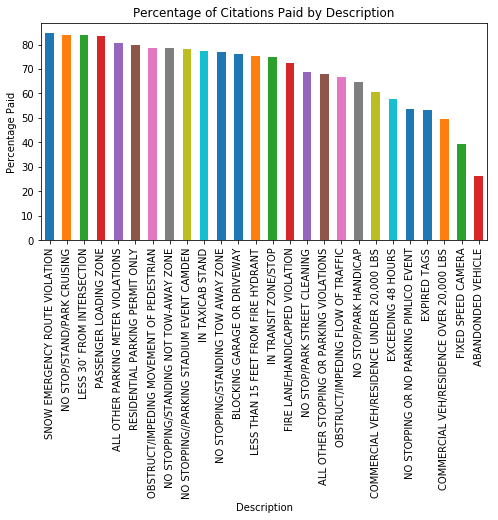

In [11]:
desc_means = df.groupby('description').mean()
fig = plt.figure(figsize=(8,4))
_ = (desc_means['paid'].sort_values(ascending=False)*100).plot(kind='bar')
_ = plt.xlabel('Description')
_ = plt.ylabel('Percentage Paid')
_ = plt.title('Percentage of Citations Paid by Description')

- `description` appears to be a good predictive variable because most citations with of `FIXED SPEED CAMERA` or `ABANDONDED VEHICLE` go unpaid, while most citations with any other description are paid.

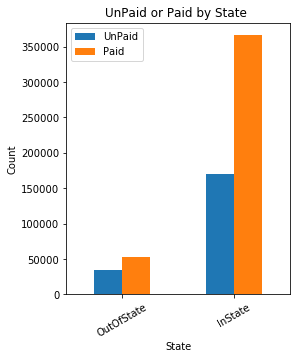

In [12]:
_ = pd.crosstab(df['instate'], df['paid']).plot(kind='bar', figsize=(4,5))
_ = plt.title('UnPaid or Paid by State ')
_ = plt.xlabel('State')
_ = plt.xticks([0,1], ['OutOfState','InState'], rotation=30)
_ = plt.ylabel('Count')
_ = plt.legend(['UnPaid', 'Paid'])

- `instate` appears to be a less powerful predictor than other variables because most citations issued to both `OutOfState` and `InState` vehicles are paid.   

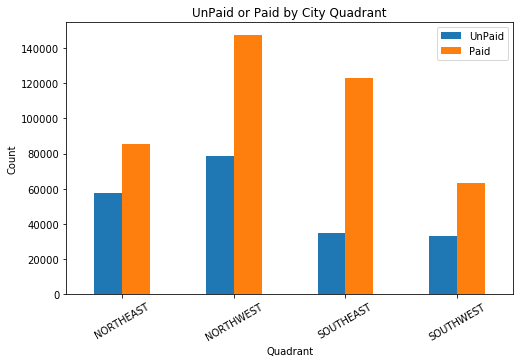

In [13]:
_ = pd.crosstab(df['quadrant'], df['paid']).plot(kind='bar', figsize=(8,5))
_ = plt.title('UnPaid or Paid by City Quadrant')
_ = plt.xlabel('Quadrant')
_ = plt.xticks(rotation=30)
_ = plt.ylabel('Count')
_ = plt.legend(['UnPaid', 'Paid'])

- `quadrant` appears to be a less powerful predictor than other variables because most citations are paid, regardless of the quadrant in which they were issued.

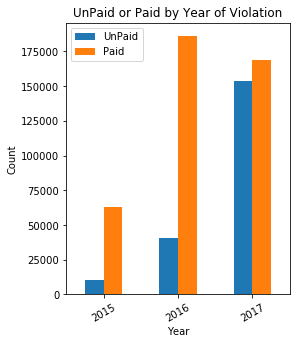

In [14]:
_ = pd.crosstab(df['year'],df['paid']).plot(kind='bar', figsize=(4,5))
_ = plt.title('UnPaid or Paid by Year of Violation')
_ = plt.xlabel('Year')
_ = plt.xticks(rotation=30)
_ = plt.ylabel('Count')
_ = plt.legend(['UnPaid', 'Paid'])

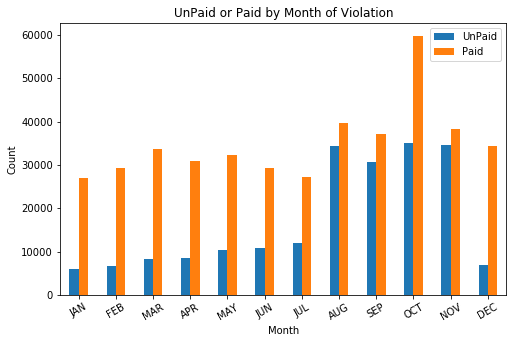

In [15]:
_ = pd.crosstab(df['month'], df['paid']).plot(kind='bar', figsize=(8,5))
_ = plt.title('UnPaid or Paid by Month of Violation')
_ = plt.xlabel('Month')
_ = plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11], ['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC'], rotation=30)
_ = plt.ylabel('Count')
_ = plt.legend(['UnPaid', 'Paid'])

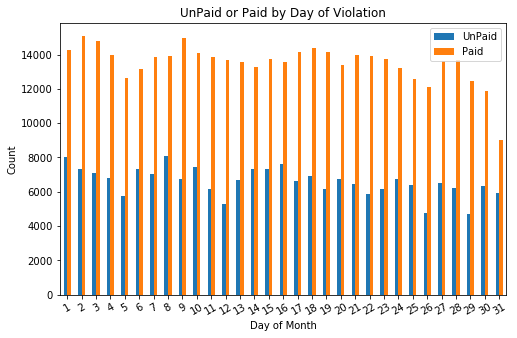

In [16]:
_ = pd.crosstab(df['day'], df['paid']).plot(kind='bar', figsize=(8,5))
_ = plt.title('UnPaid or Paid by Day of Violation')
_ = plt.xlabel('Day of Month')
_ = plt.xticks(rotation=30)
_ = plt.ylabel('Count')
_ = plt.legend(['UnPaid', 'Paid'])

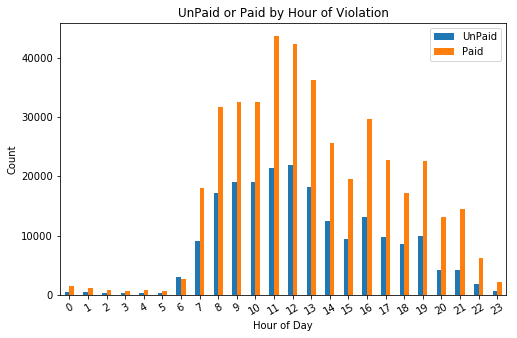

In [17]:
_ = pd.crosstab(df['hour'], df['paid']).plot(kind='bar', figsize=(8,5))
_ = plt.title('UnPaid or Paid by Hour of Violation')
_ = plt.xlabel('Hour of Day')
_ = plt.xticks(rotation=30)
_ = plt.ylabel('Count')
_ = plt.legend(['UnPaid', 'Paid'])

- `hour` appears to be the only good predictor of a temporal nature because the majority of citations issued in the `6 o'clock hour` go unpaid while citations issued at during any other hour of the day tend to be paid.

To explore dependencies between our variables in a quantitative manner, let's use the chi-square test of independence. For this test, the null hypothesis is that the variables are independent. The `scipy.stats.stats.chi2_contingency()` function returns the chi-square value as well as the p-value and the degrees of freedom. If the chi-square value is greater than the critical value for the degrees of freedom in the calculation, then we reject the null hypothesis. In other words, if the chi-square value is large enough, we conclude that the variables in question are dependent. We will choose a significance level of $\alpha$ = 0.01.

In [18]:
stats.chi2_contingency(pd.crosstab(df['paid'], df['instate']))[:3]

(2259.4150252230115, 0.0, 1)

The critical chi-square value for $\alpha$ = 0.01 and 1 degree of freedom is 6.6. Our computed value is greater than the critical value and thus we conlcude that `paid` and `instate` are dependent. 

In [19]:
stats.chi2_contingency(pd.crosstab(df['paid'], df['make']))[:3]

(11441.85110709634, 0.0, 316)

The critical chi-square value for $\alpha$ = 0.01 and 316 degrees of freedom is 377.4. Our computed value is greater than the critical value and thus we conlcude that `paid` and `make` are dependent. 

In [20]:
stats.chi2_contingency(pd.crosstab(df['paid'], df['quadrant']))[:3]

(12425.440650685199, 0.0, 3)

The critical chi-square value for $\alpha$ = 0.01 and 3 degrees of freedom is 11.3. Our computed value is greater than the critical value and thus we conlcude that `paid` and `quadrant` are dependent. 

In [21]:
stats.chi2_contingency(pd.crosstab(df['paid'], df['year']))[:3]

(67422.665217726462, 0.0, 2)

The critical chi-square value for $\alpha$ = 0.01 and 2 degrees of freedom is 9.2. Our computed value is greater than the critical value and thus we conlcude that `paid` and `year` are dependent. 

In [22]:
stats.chi2_contingency(pd.crosstab(df['paid'], df['month']))[:3]

(37408.744235353894, 0.0, 11)

The critical chi-square value for $\alpha$ = 0.01 and 11 degrees of freedom is 24.7. Our computed value is greater than the critical value and thus we conlcude that `paid` and `month` are dependent. 

In [23]:
stats.chi2_contingency(pd.crosstab(df['paid'], df['day']))[:3]

(1873.4604505743546, 0.0, 30)

The critical chi-square value for $\alpha$ = 0.01 and 30 degrees of freedom is 50.9. Our computed value is greater than the critical value and thus we conlcude that `paid` and `day` are dependent. 

In [24]:
stats.chi2_contingency(pd.crosstab(df['paid'], df['hour']))[:3]

(4780.2825841613176, 0.0, 23)

The critical chi-square value for $\alpha$ = 0.01 and 23 degrees of freedom is 41.6. Our computed value is greater than the critical value and thus we conlcude that `paid` and `hour` are dependent. 

In [25]:
stats.chi2_contingency(pd.crosstab(df['paid'], df['violcode']))[:3]

(70747.505192591649, 0.0, 25)

The critical chi-square value for $\alpha$ = 0.01 and 25 degrees of freedom is 44.3. Our computed value is greater than the critical value and thus we conlcude that `paid` and `violcode` are dependent. 

In [26]:
stats.chi2_contingency(pd.crosstab(df['paid'], df['violfine']))[:3]

(52988.558981154041, 0.0, 12)

The critical chi-square value for $\alpha$ = 0.01 and 12 degrees of freedom is 26.2. Our computed value is greater than the critical value and thus we conlcude that `paid` and `violfine` are dependent. 